# Measuring Engagement and Satisfaction in Online Mental Health Platform Conversations

## Data preprocessing

In [534]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
pd.options.display.max_colwidth = 500

In [535]:
df = pd.read_csv("mentalhealthsupport_dyadic_convs_clean_emotion.csv")

In [536]:
df.head(0)

,conversation id,subreddit,post title,author,dialog turn,text,compound,sentiment,emotion prediction


In [537]:
df = df.rename(columns={'conversation id': 'conversation_id', 'post title': 'post_title', 'dialog turn': 'dialog_turn', 'emotion prediction': 'emotion_prediction'})
df.head()

,conversation_id,subreddit,post_title,author,dialog_turn,text,compound,sentiment,emotion_prediction
0,1,MentalHealthSupport,"DBT cheat sheet, for when you need a quick reminder",missfittnc,1,[DBT Skils over view](http://www.dbtselfhelp.com/html/dbt_skills_list.html),0.0000,neutral,anticipating
1,1,MentalHealthSupport,"DBT cheat sheet, for when you need a quick reminder",skbloom,2,Thanks for sharing!,0.7177,positive,grateful
2,2,MentalHealthSupport,[BPD] Difficulty in avoiding drama,I_Am_Jacks_BPD,1,"*** **All names have been changed to protect the guilty** *** It's been two days since my meltdown subsided. I spent the better part of yesterday feeling numb, which is par for the course. I'm doing even better today. I spent the first half hour of waking up laying on the couch reading my news feed and browsing Reddit instead of sleeping for 2-3 hours. Anyway, as I sit here listening to music and sifting through the events of the past three weeks, I've come to the realization that my need ...",0.9654,positive,anticipating
3,2,MentalHealthSupport,[BPD] Difficulty in avoiding drama,redsaidfred,2,"The best advice someone ever told me was... ""I am NOT in control. I CANNOT change someone else's behaviour. Just let it go, and the universe will unfold as it should."" Felt like the weight of the world was lifted. I need to remind myself constantly...",0.7717,positive,faithful
4,3,MentalHealthSupport,How are you today and what's your recovery progress?,professorplumdidit,1,I thought maybe we should just do a thread to support each other in our own individual recovery goals as well as generally how people are feeling.,0.6486,positive,hopeful


In [538]:
### --- CLEANING OUT MONOLOGUES FROM DATASET --- ###

# Group data by conversation id and calculate count of each conversation id
df_conv = df.groupby("conversation_id").count()
df_conv = df_conv.drop(columns=["subreddit", "post_title", "author", "text", "compound", "sentiment", "emotion_prediction"])
print("Number of conversations in subreddit: ", len(df_conv))

# Separate conversation id's with a single occurrence as monologues
df_mono = df_conv[df_conv["dialog_turn"] == 1]
print("Number of monologues in subreddit: ", len(df_mono))
df_mono_ids = df_mono.reset_index()
df_mono_ids = df_mono_ids["conversation_id"]

# Separate conversation id's with multiple occurrences as dialogues
df_dia = df_conv[df_conv["dialog_turn"] > 1]
print("Number of dialogues in subreddit: ", len(df_dia))
df_dia = df_dia.reset_index()
df_dia = df_dia.drop(columns=['dialog_turn'])

# Join dialogue conversation id's with original data such that only dialogues remain in the dataset
df = df.join(df_dia.set_index('conversation_id'), on='conversation_id', how="right") 

### ---------------------------------------------- ###

Number of conversations in subreddit:  3551
Number of monologues in subreddit:  29
Number of dialogues in subreddit:  3522


In [539]:
# Either choose from long or short conversations
long_conversations = df[df["dialog_turn"] >= 4]["conversation_id"].unique()
short_conversations = df[df["dialog_turn"] < 4]["conversation_id"]
conversation = df[df["conversation_id"] == long_conversations[12]]
conversation

,conversation_id,subreddit,post_title,author,dialog_turn,text,compound,sentiment,emotion_prediction
344,145,MentalHealthSupport,Mental Disorder?,Ontanium,1,"Really hard to post this: Ok, this is going to tarnish me big time if anyone I know reads it. However I need some input on my in most furtive thoughts. I am 26 now and have believed that ever since I was in college (around 20) that there is some kind of a conspiracy around me to get me killed. When I say conspiracy, I mean like people believe me some sort of child molester, or something as bad (which I would deem worthy of death btw). So I want to list things I have done, that I dislike ...",-0.9946,negative,grateful
345,145,MentalHealthSupport,Mental Disorder?,btkbmys,2,"Everyone does things that they regret and when it comes down to it, what's done is done. You have to ask yourself this question: what can I do? If you can, at least try to resolve one of these by talking to the respective person ie rue owner of the dog and apologise or your friend. If you are able to do that, you will see that in the long run, relatively small things like that don't matter in the grand scheme of things. If you are unable to apologise for whatever reason or don't want to, you...",0.9586,positive,anxious
346,145,MentalHealthSupport,Mental Disorder?,Ontanium,3,"My biggest fear is that there has been something said about me for which people genuinely believe I deserve death. And right now as I am sitting here typing this I keep getting feelings like someone is just going to break down the door and shoot me. No matter how much I rationlise I can't get these thoughts out of my head. And I can hear a near incessant bibbing (like a car horn) which has been going on for a few days now. I can't shake these feelings, because I have seen people look at ...",-0.1670,negative,grateful
347,145,MentalHealthSupport,Mental Disorder?,Ontanium,4,"Thanks, I will try to. But the sense of paranoia and conspiracy seems to stay with me no matter what I do. And I feel quite selfish. But thanks for getting back to me, I'll use this information best I can.",0.0503,positive,guilty
348,145,MentalHealthSupport,Mental Disorder?,btkbmys,5,"There's not much I can do as me telling you that it won't happen isn't going to help you. I beg you, please seek a medical professional, you'll be able to enjoy life again.",0.5010,positive,grateful
349,145,MentalHealthSupport,Mental Disorder?,Ontanium,6,I probably will seek advice online. I had a drop of brandy which seems to have helped (only a bit). Thanks for getting back to me again.,0.2023,positive,faithful
350,145,MentalHealthSupport,Mental Disorder?,btkbmys,7,"Well done for seeking help, it's very brave. As someone with various mental health issues I can testify to how difficult it is to go for help. Also brandy is great but don't let it become a coping mechanism :)",0.8859,positive,lonely


In [540]:
# some long conversations: 1003

## Measuring the level of engagement

### Does the speaker respond back when the listener gives a response?

In [541]:
def extract_responses(conversation):
    speaker = conversation.author.iloc[0]
    listener = conversation[conversation["author"] != speaker]["author"].unique().item()
    speaker_responses = conversation[conversation["author"] == speaker]
    listener_responses = conversation[conversation["author"] == listener]
    num_speaker_responses = len(speaker_responses)
    num_listener_responses = len(listener_responses)
    
    return speaker, listener, speaker_responses, listener_responses, num_speaker_responses, num_listener_responses

In [542]:
def calculate_speaker_listener_ratio(conversation):
    _, _, _, _, num_speaker_responses, num_listener_responses = extract_responses(conversation)
    speaker_listener_ratio = num_speaker_responses / num_listener_responses
    
    engagement = ""
    if len(conversation) == 2:
        engagement = "low"
    elif len(conversation) <= 4 and speaker_listener_ratio < 1:
        engagement = "low"
    elif len(conversation) <= 4 and speaker_listener_ratio >= 1:
        engagement = "moderate"
    elif len(conversation) >= 4 and speaker_listener_ratio < 1:
        engagement = "moderate"
    elif len(conversation) >= 4  and speaker_listener_ratio >= 1:
        engagement = "high"
        
    return speaker_listener_ratio, engagement

In [543]:
calculate_speaker_listener_ratio(conversation)

(1.3333333333333333, 'high')

### Does the listener ask any informative questions or give any suggestions? 

In [544]:
speaker, listener, speaker_responses, listener_responses, num_speaker_responses, num_listener_responses = extract_responses(conversation)

In [545]:
df[df["emotion_prediction"]=="questioning"]

,conversation_id,subreddit,post_title,author,dialog_turn,text,compound,sentiment,emotion_prediction
799,342,MentalHealthSupport,Mental Health in the Black Community,yadadameannn,4,thanks man. We just got everything fixed. We were working on coding this weekend. Everything is fine now.,0.5719,positive,questioning
1070,455,MentalHealthSupport,I’m really struggling,McThrowaway42069,2,"Dont. No matter how bad it seems there a people who care for you. You are loved, don't hurt the people who care about you.",0.8635,positive,questioning
1361,578,MentalHealthSupport,Let Me Introduce Myself,antwerpbanana,2,"Hi Caty, thank you for sharing your story. I hope we can be of help to you here.",0.8720,positive,questioning
4239,1761,MentalHealthSupport,Feel awful,TheBassClarinetBoy,2,"Hey friend. I’m recommend talking with people you trust about this, and trying to find professional help",0.8934,positive,questioning
5636,2414,MentalHealthSupport,Need help! Mental health destroying relationship...,Rock-it1,2,Therapist here. Can you provide a few more details?,0.0000,neutral,questioning


In [546]:
print(df[(df["conversation_id"]==342) & (df["dialog_turn"]==4)]["text"])
print(df[(df["conversation_id"]==455) & (df["dialog_turn"]==2)]["text"])
print(df[(df["conversation_id"]==578) & (df["dialog_turn"]==2)]["text"])
print(df[(df["conversation_id"]==1761) & (df["dialog_turn"]==2)]["text"])
print(df[(df["conversation_id"]==2414) & (df["dialog_turn"]==2)]["text"])

799    thanks man. We just got everything fixed. We were working on coding this weekend. Everything is fine now. 
Name: text, dtype: object
1070    Dont. No matter how bad it seems there a people who care for you. You are loved, don't hurt the people who care about you.
Name: text, dtype: object
1361    Hi Caty, thank you for sharing your story. I hope we can be of help to you here.
Name: text, dtype: object
4239    Hey friend. I’m recommend talking with people you trust about this, and trying to find professional help
Name: text, dtype: object
5636    Therapist here. Can you provide a few more details?
Name: text, dtype: object


The emotion prediction tags are not very accurate. Only the last of the listener responses above are questioning. 

In [547]:
df[df["emotion_prediction"]=="suggesting"]

,conversation_id,subreddit,post_title,author,dialog_turn,text,compound,sentiment,emotion_prediction


There are no posts with a suggesting tag in this subreddit. Therefore, it cannot be utilized in the calculation of the engagement measure.

In [548]:
# TODO: separately label each & every sentence, currently only the whole text is labeled

### How the literature measures engagement

## Measuring the level of satisfaction

### Lexical details: "Thank you", "It means a lot"

### Shift of sentiment in speaker responses (sentiment trend)

In [549]:
speaker_responses

,conversation_id,subreddit,post_title,author,dialog_turn,text,compound,sentiment,emotion_prediction
344,145,MentalHealthSupport,Mental Disorder?,Ontanium,1,"Really hard to post this: Ok, this is going to tarnish me big time if anyone I know reads it. However I need some input on my in most furtive thoughts. I am 26 now and have believed that ever since I was in college (around 20) that there is some kind of a conspiracy around me to get me killed. When I say conspiracy, I mean like people believe me some sort of child molester, or something as bad (which I would deem worthy of death btw). So I want to list things I have done, that I dislike ...",-0.9946,negative,grateful
346,145,MentalHealthSupport,Mental Disorder?,Ontanium,3,"My biggest fear is that there has been something said about me for which people genuinely believe I deserve death. And right now as I am sitting here typing this I keep getting feelings like someone is just going to break down the door and shoot me. No matter how much I rationlise I can't get these thoughts out of my head. And I can hear a near incessant bibbing (like a car horn) which has been going on for a few days now. I can't shake these feelings, because I have seen people look at ...",-0.1670,negative,grateful
347,145,MentalHealthSupport,Mental Disorder?,Ontanium,4,"Thanks, I will try to. But the sense of paranoia and conspiracy seems to stay with me no matter what I do. And I feel quite selfish. But thanks for getting back to me, I'll use this information best I can.",0.0503,positive,guilty
349,145,MentalHealthSupport,Mental Disorder?,Ontanium,6,I probably will seek advice online. I had a drop of brandy which seems to have helped (only a bit). Thanks for getting back to me again.,0.2023,positive,faithful


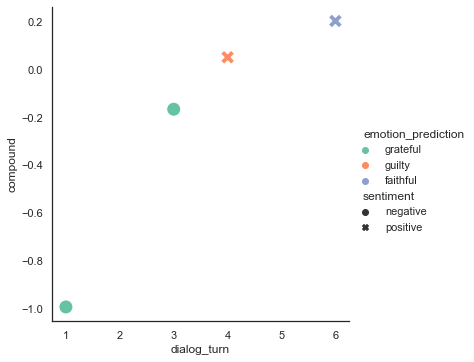

In [550]:
sns.set_theme(style="white")
sns.relplot(x="dialog_turn", y="compound", hue="emotion_prediction", style="sentiment", palette="Set2", data=speaker_responses, s=200)

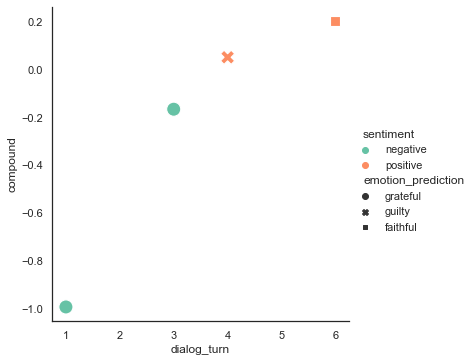

In [551]:
sns.set_theme(style="white")
sns.relplot(x="dialog_turn", y="compound", hue="sentiment", style="emotion_prediction", palette="Set2",data=speaker_responses, s=200)

In [552]:
def calculate_sentiment_shift(responses):
    x = np.array(responses["dialog_turn"]).reshape((-1, 1))
    y = np.array(responses["compound"])
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    
    satisfaction = ""
    if r_sq >= 0.5: # TODO: play with these variables (maybe even do some ML to learn these params)
        satisfaction = "positive"
    elif r_sq >= 0.3:
        satisfaction = "moderate"
    elif r_sq < 0.3 and r_sq >= 0:
        satisfaction = "neutral"
    elif r_sq < 0:
        satisfaction = "negative"
        
    return r_sq, satisfaction

In [553]:
calculate_sentiment_shift(speaker_responses)

(0.8661091484878147, 'positive')

In [554]:
def get_sentiment(responses):
    sentiments = responses["sentiment"]
    final_sentiment = sentiments.iloc[-1]
    
    return sentiments, final_sentiment

### If the last speaker turn has grateful emotion and has positive sentiment

In [555]:
def get_emotion_prediction(responses):
    emotions = responses["emotion_prediction"]
    final_emotion = emotions.iloc[-1]
    
    return emotions, final_emotion

In [556]:
get_emotion_prediction(speaker_responses)

(344    grateful
 346    grateful
 347      guilty
 349    faithful
 Name: emotion_prediction, dtype: object,
 'faithful')

### How the literature measures satisfaction

## Equation to measure the engagement and satisfaction of a conversation

In [557]:
def classify_conversation(conversation):
    print(calculate_speaker_listener_ratio(conversation)[1] + " engagement, " + calculate_sentiment_shift(speaker_responses)[1] + " satisfaction")

In [558]:
conversation

,conversation_id,subreddit,post_title,author,dialog_turn,text,compound,sentiment,emotion_prediction
344,145,MentalHealthSupport,Mental Disorder?,Ontanium,1,"Really hard to post this: Ok, this is going to tarnish me big time if anyone I know reads it. However I need some input on my in most furtive thoughts. I am 26 now and have believed that ever since I was in college (around 20) that there is some kind of a conspiracy around me to get me killed. When I say conspiracy, I mean like people believe me some sort of child molester, or something as bad (which I would deem worthy of death btw). So I want to list things I have done, that I dislike ...",-0.9946,negative,grateful
345,145,MentalHealthSupport,Mental Disorder?,btkbmys,2,"Everyone does things that they regret and when it comes down to it, what's done is done. You have to ask yourself this question: what can I do? If you can, at least try to resolve one of these by talking to the respective person ie rue owner of the dog and apologise or your friend. If you are able to do that, you will see that in the long run, relatively small things like that don't matter in the grand scheme of things. If you are unable to apologise for whatever reason or don't want to, you...",0.9586,positive,anxious
346,145,MentalHealthSupport,Mental Disorder?,Ontanium,3,"My biggest fear is that there has been something said about me for which people genuinely believe I deserve death. And right now as I am sitting here typing this I keep getting feelings like someone is just going to break down the door and shoot me. No matter how much I rationlise I can't get these thoughts out of my head. And I can hear a near incessant bibbing (like a car horn) which has been going on for a few days now. I can't shake these feelings, because I have seen people look at ...",-0.1670,negative,grateful
347,145,MentalHealthSupport,Mental Disorder?,Ontanium,4,"Thanks, I will try to. But the sense of paranoia and conspiracy seems to stay with me no matter what I do. And I feel quite selfish. But thanks for getting back to me, I'll use this information best I can.",0.0503,positive,guilty
348,145,MentalHealthSupport,Mental Disorder?,btkbmys,5,"There's not much I can do as me telling you that it won't happen isn't going to help you. I beg you, please seek a medical professional, you'll be able to enjoy life again.",0.5010,positive,grateful
349,145,MentalHealthSupport,Mental Disorder?,Ontanium,6,I probably will seek advice online. I had a drop of brandy which seems to have helped (only a bit). Thanks for getting back to me again.,0.2023,positive,faithful
350,145,MentalHealthSupport,Mental Disorder?,btkbmys,7,"Well done for seeking help, it's very brave. As someone with various mental health issues I can testify to how difficult it is to go for help. Also brandy is great but don't let it become a coping mechanism :)",0.8859,positive,lonely


In [559]:
classify_conversation(conversation)

high engagement, positive satisfaction


In [560]:
calculate_speaker_listener_ratio(conversation)

(1.3333333333333333, 'high')

In [561]:
calculate_sentiment_shift(speaker_responses)

(0.8661091484878147, 'positive')